<a href="https://colab.research.google.com/github/Sahilgupta100/pw_skills_assignment/blob/main/Eda_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [254]:
df = pd.read_csv('/content/BIKE DETAILS (2).csv')

In [255]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [256]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [257]:
df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64


In [258]:
df.shape

(1061, 7)

In [259]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [260]:
df['ex_showroom_price'].isnull()

,ex_showroom_price
0,True
1,True
2,False
3,False
4,True
...,...
1056,False
1057,False
1058,False
1059,False


In [261]:
#What is the range of selling prices in the dataset ?
df['selling_price'].describe()
df['selling_price'].agg({'minimum_range':'min','maximum_range':'max'})

,selling_price
minimum_range,5000
maximum_range,760000


In [262]:
#What is the median selling price for bikes in the dataset ?
df['selling_price'].median()

45000.0

In [263]:
#What is the most common seller type ?
most_common_seller_type = df['seller_type'].mode()
print(f"most common seller type:{most_common_seller_type}")

most common seller type:0    Individual
Name: seller_type, dtype: object


In [264]:
#How many bikes have driven more than 50,000 kilometers?
bikes_driven_more = len(df[df['km_driven']>50000])
print(f"number of bikes driven more than 50,000 kilometers:{bikes_driven_more}")

number of bikes driven more than 50,000 kilometers:170


In [265]:
#What is the average km_driven value for each ownership type ?
average_value = df.groupby('owner')['km_driven'].mean()
print(average_value)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [266]:
#What proportion of bikes are from the year 2015 or older ?
bikes_2015_older = len(df[df['year']<=2015])
total_bikes = len(df)
proportion = bikes_2015_older/total_bikes
print(f"proportion of bikes from the year 2015 or older:{proportion}")

proportion of bikes from the year 2015 or older:0.5664467483506126


In [267]:
# What is the trend of missing values across the dataset?
missing_values = df.isnull().sum()
print("7. Missing values trend:\n", missing_values)


7. Missing values trend:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [268]:
# 8. What is the highest ex_showroom_price recorded, and for which bike?
highest_price_bike = df.loc[df['ex_showroom_price'].idxmax()]
print(" Highest ex-showroom price:\n", highest_price_bike[['name', 'ex_showroom_price']])


 Highest ex-showroom price:
 name                 Harley-Davidson Street Bob
ex_showroom_price                     1278000.0
Name: 134, dtype: object


In [269]:
#What is the total number of bikes listed by each seller type?
bike_count = df['seller_type'].value_counts()
print("Total number of bikes listed by each seller type:\n", bike_count)

Total number of bikes listed by each seller type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [270]:
#What is the relationship between selling_price and km_driven for first-owner bikes ?
df['owner'] = df['owner'].str.replace('1st owner', '1')
first_owner_data = df[df['owner'] == '1']
first_owner_data['selling_price'].corr(first_owner_data['km_driven'])


np.float64(-0.2434817484496572)

In [271]:
df.seller_type

,seller_type
0,Individual
1,Individual
2,Individual
3,Individual
4,Individual
...,...
1056,Individual
1057,Individual
1058,Individual
1059,Individual


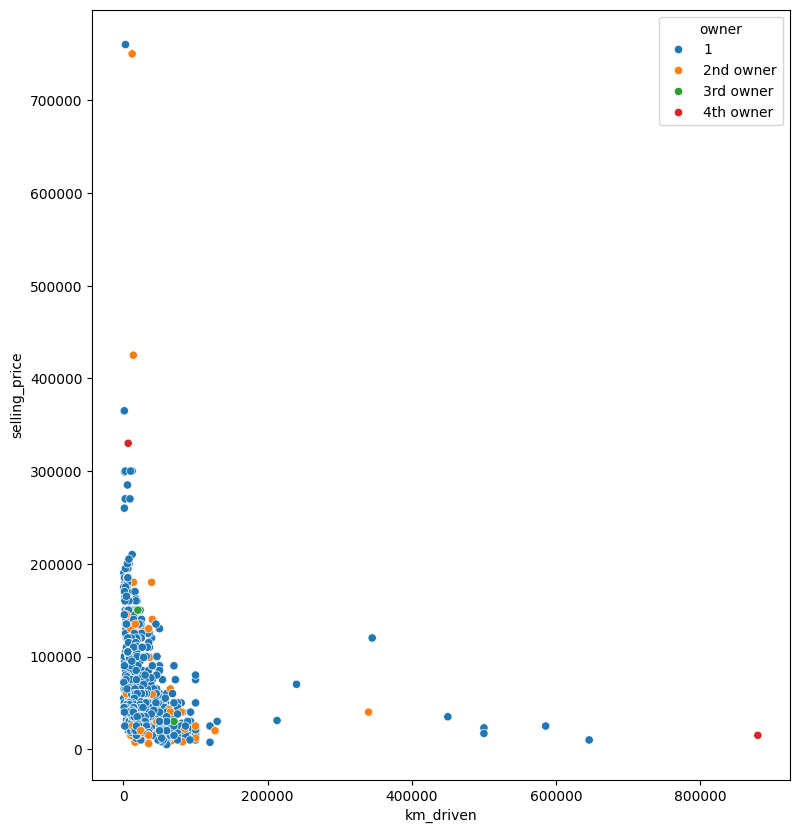

In [272]:
#What is the relationship between selling_price and km_driven for first-owner bikes ?
plt.figure(figsize =(9,10))
sns.scatterplot(x = df['km_driven'], y = df['selling_price'], hue = df['owner'])
plt.show()

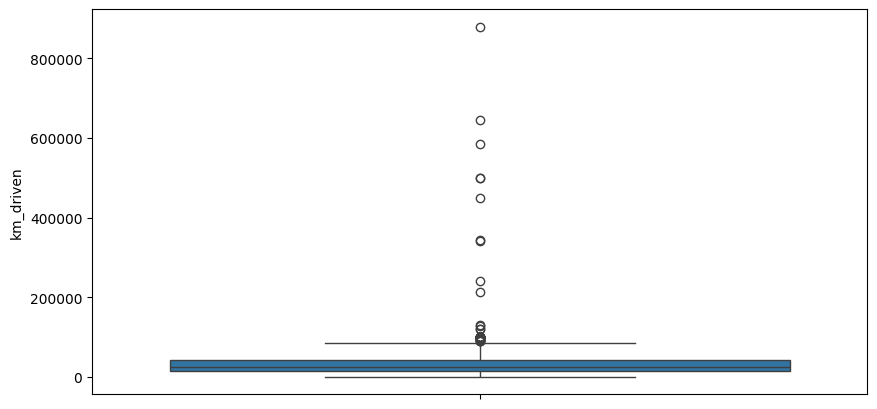

In [273]:
#Identify and remove outliers in the km_driven column using the IQR method
plt.figure(figsize=(10,5))
sns.boxplot(df['km_driven'])
plt.show()

In [274]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print(f"11. Outliers removed. Original shape: {df.shape}, New shape: {df_no_outliers.shape}")


11. Outliers removed. Original shape: (1061, 7), New shape: (1022, 7)


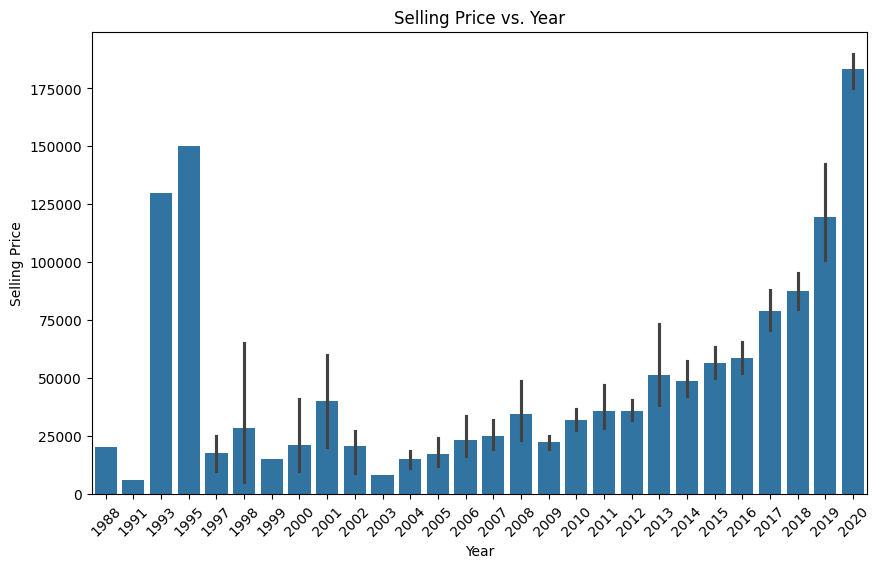

In [275]:
#Perform a bivariate analysis to visualize the relationship between year and selling_price?
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='selling_price', data=df)
plt.title('Selling Price vs. Year')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

In [276]:
import datetime
#  What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
current_year = datetime.datetime.now().year  # Importing datetime
df['bike_age'] = current_year - df['year']
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']
avg_depreciation = df.groupby('bike_age')['depreciation'].mean()
print(" Average depreciation by bike age:\n", avg_depreciation)

 Average depreciation by bike age:
 bike_age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22306.082353
9     28328.190476
10    28013.275000
11    34505.606061
12    43086.886792
13    37317.648649
14    47102.666667
15    45658.928571
16    38227.785714
17    54732.428571
18    42399.000000
19    39664.500000
20    44852.000000
21    36852.000000
22             NaN
23             NaN
24    34852.000000
25             NaN
26             NaN
27             NaN
28             NaN
30             NaN
32             NaN
34             NaN
37             NaN
Name: depreciation, dtype: float64


In [277]:
#Which bike names are priced significantly above the average price for their manufacturing year ?
def find_expensive_bikes(df1):
    expensive_bikes = []
    for year in df1['year'].unique():
        year_df1 = df1[df1['year'] == year]
        avg_price = year_df1['selling_price'].mean()
        std_price = year_df1['selling_price'].std()
        threshold = avg_price + 1.96 * std_price  # 95% confidence interval
        expensive_bikes.extend(year_df1[year_df1['selling_price'] > threshold]['name'].tolist())
    return expensive_bikes

expensive_bikes = find_expensive_bikes(df)
print("14. Bikes priced significantly above average for their year:\n", expensive_bikes)


14. Bikes priced significantly above average for their year:
 ['Yamaha YZF R3', 'Suzuki GSX S750', 'KTM RC 390', 'KTM RC 390', 'Kawasaki Ninja 650 [2018-2019]', 'BMW G310GS', 'Royal Enfield Classic Signals', 'Royal Enfield Thunderbird 500X', 'Royal Enfield Classic Gunmetal Grey', 'KTM 390 Duke', 'KTM 390 Duke ABS [2013-2016]', 'Royal Enfield Bullet 500', 'Royal Enfield Classic Desert Storm', 'KTM 390 Duke ABS [2013-2016]', 'Royal Enfield Classic Chrome', 'Royal Enfield Classic Desert Storm', 'Royal Enfield Classic Chrome', 'Kawasaki Ninja 650 [2018-2019]', 'Royal Enfield Electra 5 S', 'Kawasaki Ninja 250R', 'Royal Enfield Thunderbird 350', 'Royal Enfield Bullet 350 [2007-2011]', 'Royal Enfield Classic 350', 'KTM 200 Duke', 'Royal Enfield Thunderbird 350', 'Kawasaki Ninja 300', 'Hyosung GT250R', 'Royal Enfield Classic Desert Storm', 'Royal Enfield Thunderbird 350', 'Royal Enfield Thunderbird 350', 'Royal Enfield Electra 5 S', 'Royal Enfield Electra 5 S', 'Royal Enfield Electra 5 S', 'Ha

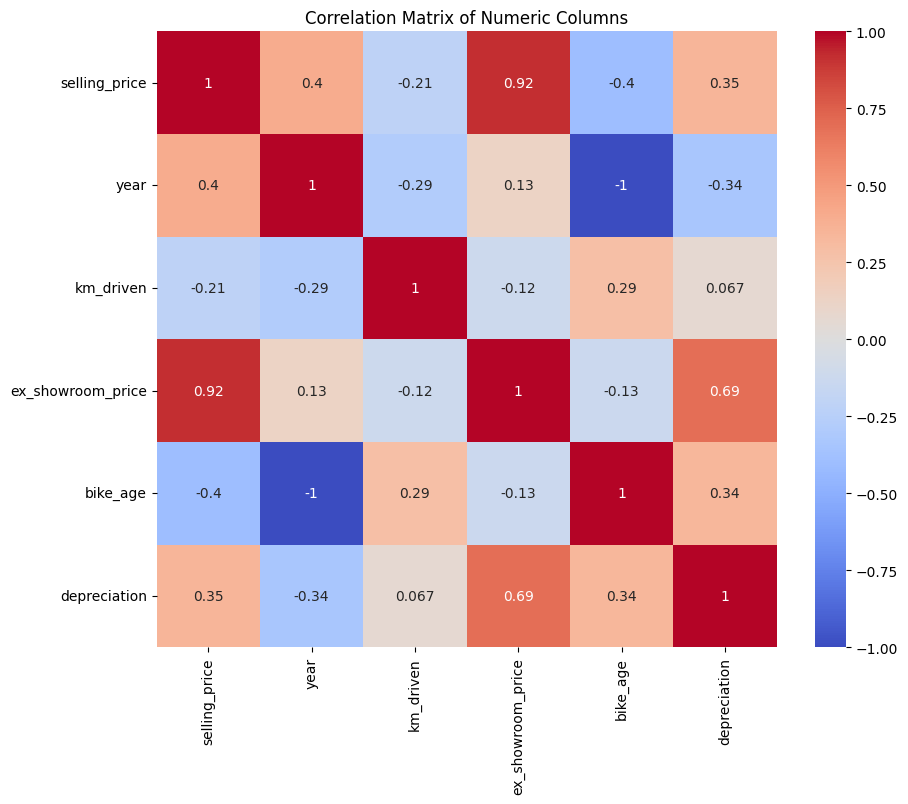

In [278]:
# Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


#Title: Car Sale Dataset Source: The dataset is available on Kaggle, representing data commonly seen in online car resale platforms. Description: The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis, and understanding customer preferences.

In [279]:
df_car = pd.read_csv('/content/Car Sale.csv.crdownload')

In [280]:
df_car.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000.0,06457-3834,SUV,8264678.0,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000.0,60504-7114,SUV,6848189.0,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500.0,38701-8047,Passenger,7298798.0,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000.0,99301-3882,SUV,6257557.0,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500.0,53546-9427,Hatchback,7081483.0,Janesville


In [281]:
df_car.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [282]:
df_car.size

222704

In [283]:
df_car.shape

(13919, 16)

In [284]:
df_car.duplicated().sum()

np.int64(0)

In [285]:
df_car.dropna(axis = 0)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000.0,06457-3834,SUV,8264678.0,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000.0,60504-7114,SUV,6848189.0,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500.0,38701-8047,Passenger,7298798.0,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000.0,99301-3882,SUV,6257557.0,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500.0,53546-9427,Hatchback,7081483.0,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13913,C_CND_013914,5/22/2023,Ruth,Male,415000,New Castle Ford Lincoln Mercury,Chrysler,LHS,DoubleÂ Overhead Camshaft,Auto,Black,26000.0,60504-7114,Hatchback,8815144.0,Aurora
13914,C_CND_013915,5/22/2023,Sabrina,Male,519000,Pars Auto Sales,Honda,Accord,Overhead Camshaft,Manual,Black,43000.0,38701-8047,Sedan,6716118.0,Greenville
13915,C_CND_013916,5/22/2023,Sadie,Male,3270000,Pitre Buick-Pontiac-Gmc of Scottsdale,Nissan,Maxima,Overhead Camshaft,Manual,Pale White,54000.0,99301-3882,Sedan,7694302.0,Pasco
13916,C_CND_013917,5/22/2023,Salma,Male,13500,Progressive Shippers Cooperative Association No,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Red,22000.0,53546-9427,SUV,7635011.0,Janesville


In [286]:
#1 What is the average selling price of cars for each dealer, and how does it compare across different dealers ?
average_selling_price = df_car.groupby('Dealer_No ')['Price ($)'].mean().sort_values(ascending = False)
print(average_selling_price)


Dealer_No 
78758-7841    28536.428114
99301-3882    28311.424058
06457-3834    28206.261431
85257-3102    28195.641648
60504-7114    28099.928105
38701-8047    27901.250000
53546-9427    27711.699820
Name: Price ($), dtype: float64


In [287]:
df_car['Dealer_No '].unique()

array(['06457-3834', '60504-7114', '38701-8047', '99301-3882',
       '53546-9427', '85257-3102', '78758-7841', nan], dtype=object)

In [288]:
#2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
brand_variation = df_car.groupby('Company')['Price ($)'].std().sort_values(ascending = False)
print(brand_variation)

Company
Cadillac      19503.359641
Lincoln       19255.222588
Saab          19126.936734
Plymouth      18706.920246
Lexus         17962.925155
Buick         17418.655959
Mercury       16555.916920
Nissan        16230.216691
Saturn        16104.898900
Oldsmobile    15991.461416
Ford          15853.876230
Mercedes-B    15654.763293
Toyota        15527.207589
BMW           15042.376794
Pontiac       14315.324717
Chevrolet     13675.483440
Infiniti      13442.365568
Audi          13119.651863
Volvo         12999.469481
Subaru        12930.154119
Volkswagen    12716.276588
Chrysler      11791.920347
Mitsubishi    11772.458973
Honda         11284.974207
Dodge         11207.424498
Jaguar        10268.946873
Jeep           9734.735488
Acura          8113.275716
Porsche        5246.093228
Hyundai        3565.648153
Name: Price ($), dtype: float64


               count          mean           std      min      25%      50%  \
Transmission                                                                  
Auto          7327.0  28291.510714  13729.881966   9000.0  19000.0  24000.0   
Manual        6591.0  27965.215597  15956.561376  10000.0  17000.0  22001.0   

                  75%      max  
Transmission                    
Auto          35001.0  75700.0  
Manual        34000.0  85800.0  


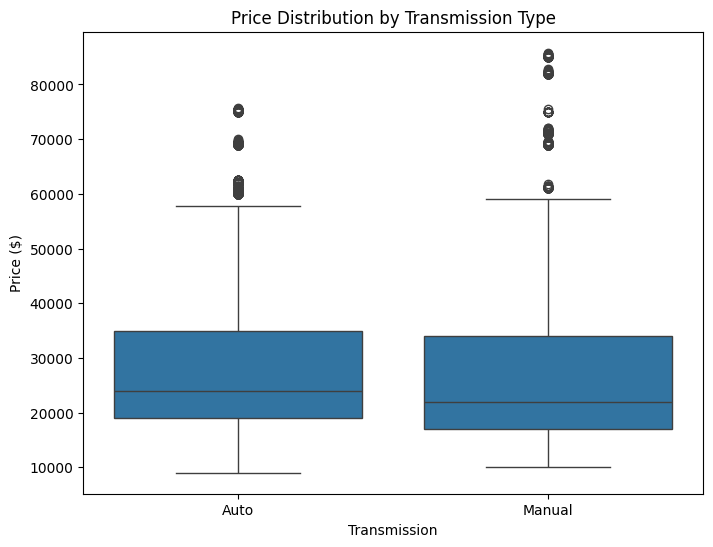

In [289]:
# 3What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
transmission_distribution = df_car.groupby('Transmission')['Price ($)'].describe()
print(transmission_distribution)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df_car)
plt.title('Price Distribution by Transmission Type')
plt.show()

                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         1843.0  28196.792729  15060.259619  9000.0  18001.0  22501.0   
Austin         2379.0  28496.187474  14936.186735  9000.0  18675.0  24000.0   
Greenville     1818.0  28158.053905  14990.275709  9000.0  18001.0  22501.0   
Janesville     2236.0  27836.726744  14348.759683  9000.0  18001.0  22800.5   
Middletown     1843.0  28238.819316  15027.818604  9000.0  18000.0  23000.0   
Pasco          1813.0  28249.993381  14740.396764  9000.0  18500.0  23500.0   
Scottsdale     1986.0  27772.341893  14752.637575  9000.0  18000.0  22550.5   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         36000.0  85001.0  
Greenville     34000.0  85200.0  
Janesville     34000.0  85301.0  
Middletown     34001.0  85300.0  
Pasco          34001.0  85600.0  
Scottsdale     3

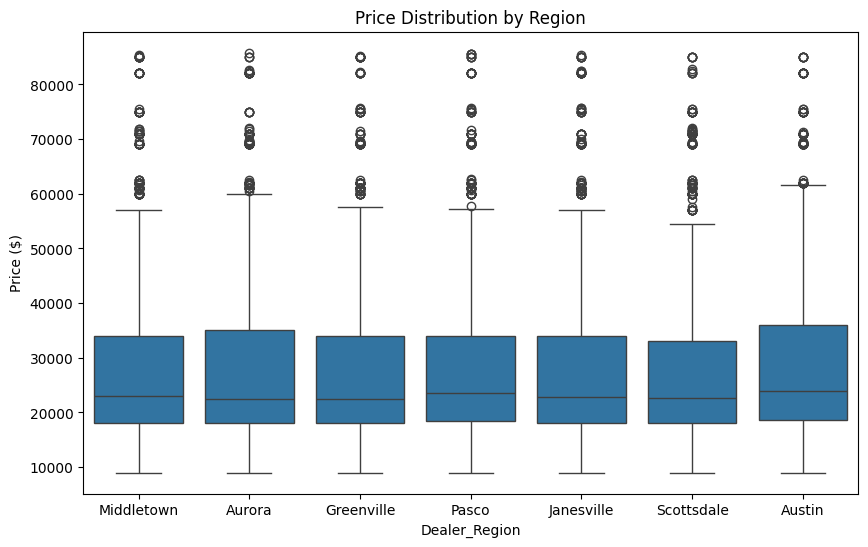

In [290]:
# 4 What is the distribution of car prices across different regions ?
region_distribution = df_car.groupby('Dealer_Region')['Price ($)'].describe()
print(region_distribution)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df_car)
plt.title('Price Distribution by Region')
plt.show()


In [291]:
df_car.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

           count unique         top freq
Body Style                              
Hardtop     1661     23   Chevrolet  228
Hatchback   3858     29  Mitsubishi  297
Passenger   2305     24   Chevrolet  245
SUV         3477     27       Dodge  343
Sedan       2617     23  Oldsmobile  348


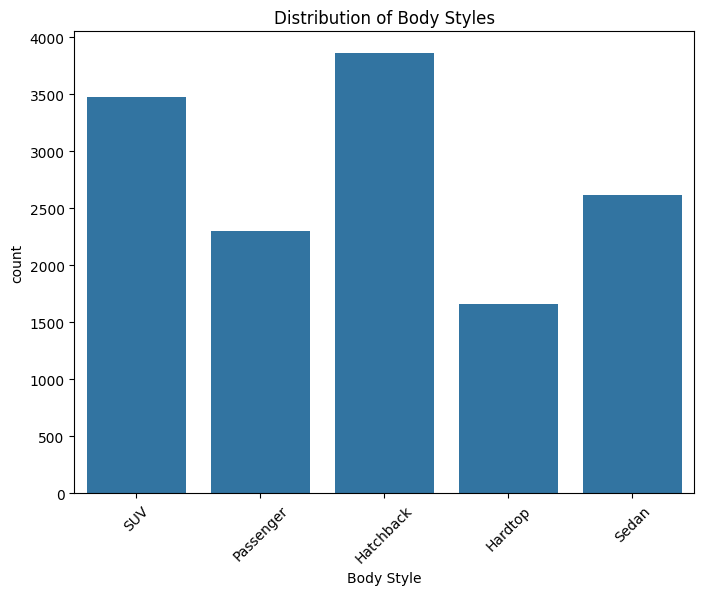

In [292]:
# 5What is the distribution of cars based on body styles ?
body_style_distribution = df_car.groupby('Body Style')['Company'].describe()
print(body_style_distribution)
plt.figure(figsize=(8, 6))
sns.countplot(x='Body Style', data=df_car)
plt.title('Distribution of Body Styles')
plt.xticks(rotation=45)
plt.show()

In [293]:
df_car.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [294]:
# 6 How does the average selling price of cars vary by customer gender and annual income?
gender_income_distribution = df_car.groupby(['Gender', 'Annual Income'])['Price ($)'].mean()
print(gender_income_distribution)


Gender  Annual Income
Female  13500            28007.329635
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        253000           16000.000000
                             ...     
Male    6050000          14001.000000
        6400000          71000.000000
        6500000          25000.000000
        6800000          15000.000000
        7650000          21000.000000
Name: Price ($), Length: 2676, dtype: float64


                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         1843.0  28196.792729  15060.259619  9000.0  18001.0  22501.0   
Austin         2379.0  28496.187474  14936.186735  9000.0  18675.0  24000.0   
Greenville     1818.0  28158.053905  14990.275709  9000.0  18001.0  22501.0   
Janesville     2236.0  27836.726744  14348.759683  9000.0  18001.0  22800.5   
Middletown     1843.0  28238.819316  15027.818604  9000.0  18000.0  23000.0   
Pasco          1813.0  28249.993381  14740.396764  9000.0  18500.0  23500.0   
Scottsdale     1986.0  27772.341893  14752.637575  9000.0  18000.0  22550.5   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         36000.0  85001.0  
Greenville     34000.0  85200.0  
Janesville     34000.0  85301.0  
Middletown     34001.0  85300.0  
Pasco          34001.0  85600.0  
Scottsdale     3

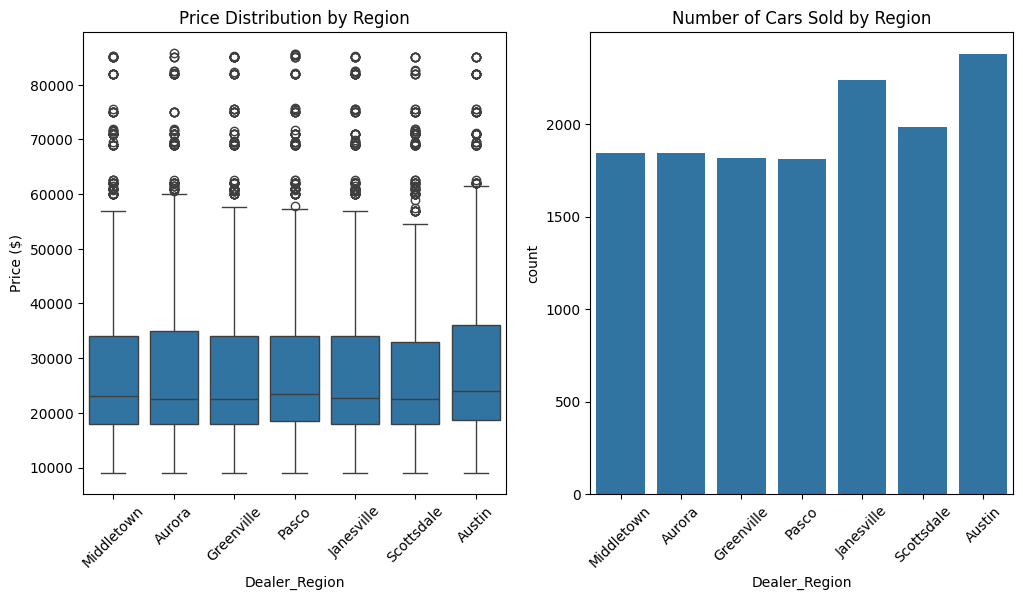

In [295]:
# 7 What is the distribution of car prices by region, and how does the number of cars sold vary by region?
region_price_distribution = df_car.groupby('Dealer_Region')['Price ($)'].describe()
print(region_price_distribution)
region_sale_distribution = df_car.groupby('Dealer_Region')['Company'].count()
print(region_sale_distribution)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df_car)
plt.title('Price Distribution by Region')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='Dealer_Region', data=df_car)
plt.title('Number of Cars Sold by Region')
plt.xticks(rotation=45)
plt.show()

In [296]:
df_car.columns
df_car['Engine'].unique()

array(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft',
       'DoubleÂ\xa0Overhead Ca'], dtype=object)

In [297]:
# 8 How does the average car price differ between cars with different engine sizes ?
engine_size_price_distribution = df_car.groupby('Engine')['Price ($)'].mean()
print(engine_size_price_distribution)


Engine
DoubleÂ Overhead Ca                   NaN
DoubleÂ Overhead Camshaft    28291.510714
Overhead Camshaft            27965.215597
Name: Price ($), dtype: float64


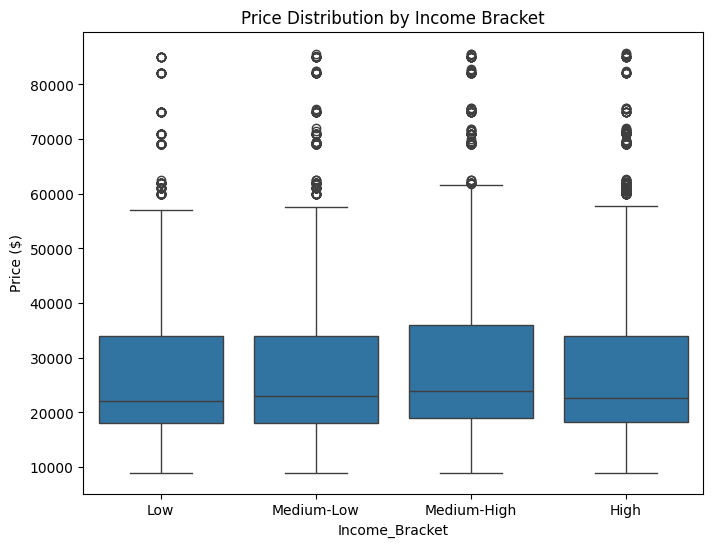

In [298]:
# 9How do car prices vary based on the customer’s annual income bracket?
df_car['Income_Bracket'] = pd.qcut(df_car['Annual Income'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High']) # Create income brackets.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Income_Bracket', y='Price ($)', data=df_car)
plt.title('Price Distribution by Income Bracket')
plt.show()

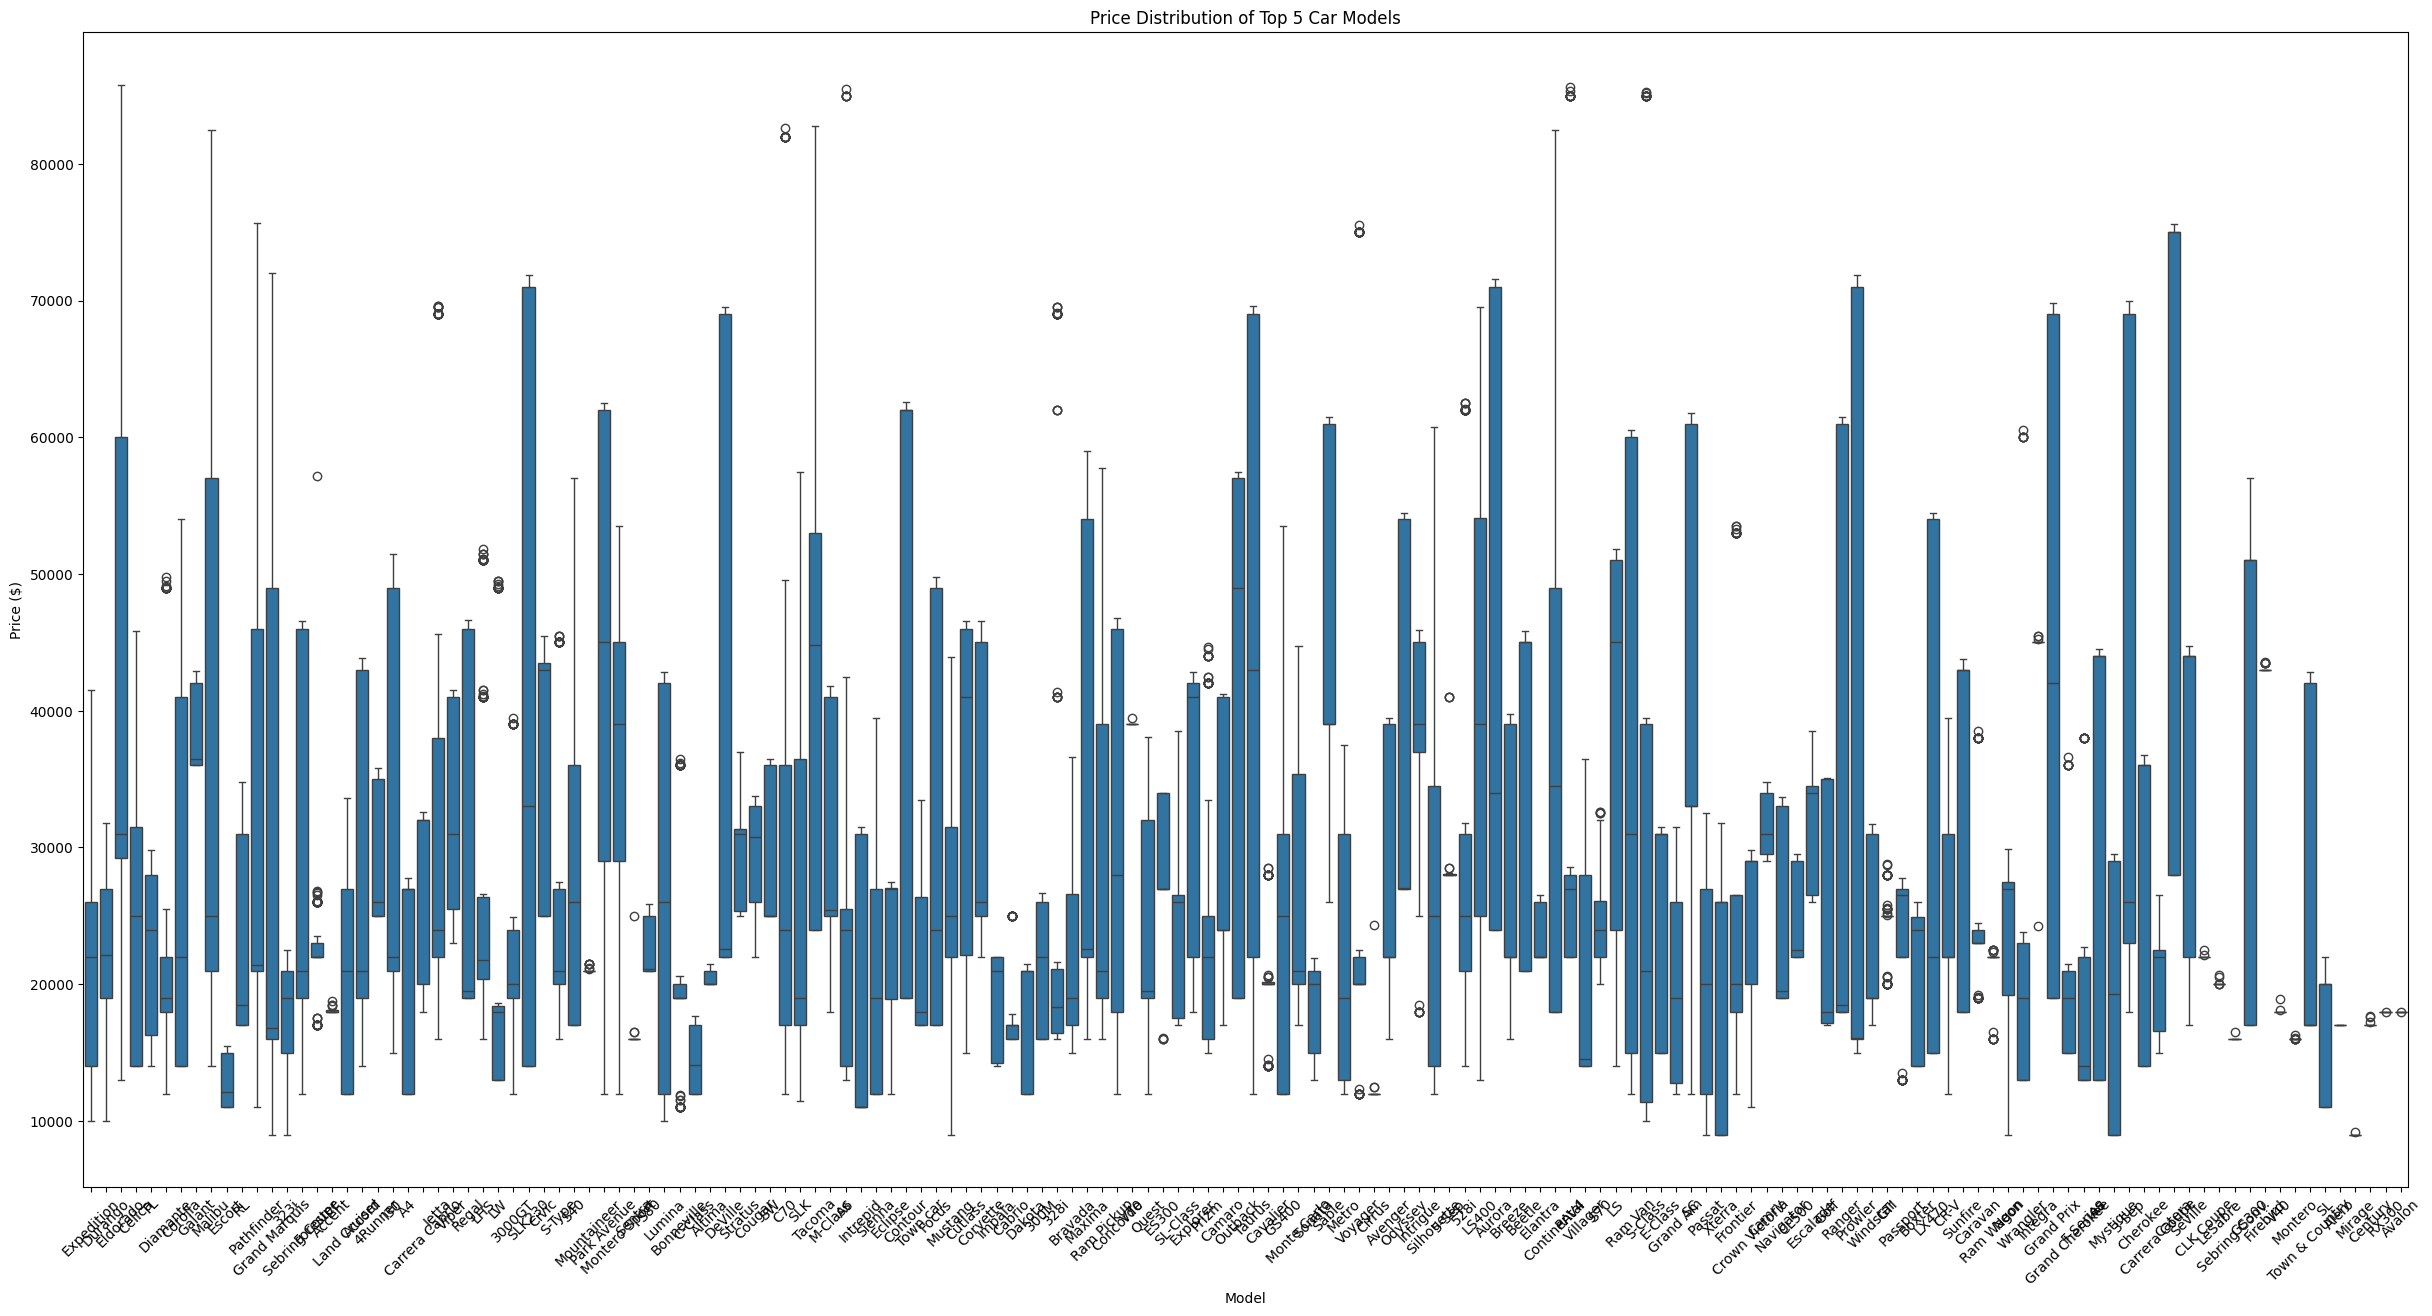

In [299]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_5_models = df_car['Model'].value_counts().head(5).index
top_5_models = df_car[df_car['Model'].isin(top_5_models)]
plt.figure(figsize=(30, 15))
sns.boxplot(x='Model', y='Price ($)', data=df_car)
plt.title('Price Distribution of Top 5 Car Models')
plt.xticks(rotation=45)
plt.show()

In [300]:
df_car

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income_Bracket
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000.0,06457-3834,SUV,8264678.0,Middletown,Low
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000.0,60504-7114,SUV,6848189.0,Aurora,High
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500.0,38701-8047,Passenger,7298798.0,Greenville,Medium-High
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000.0,99301-3882,SUV,6257557.0,Pasco,Low
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500.0,53546-9427,Hatchback,7081483.0,Janesville,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13914,C_CND_013915,5/22/2023,Sabrina,Male,519000,Pars Auto Sales,Honda,Accord,Overhead Camshaft,Manual,Black,43000.0,38701-8047,Sedan,6716118.0,Greenville,Medium-Low
13915,C_CND_013916,5/22/2023,Sadie,Male,3270000,Pitre Buick-Pontiac-Gmc of Scottsdale,Nissan,Maxima,Overhead Camshaft,Manual,Pale White,54000.0,99301-3882,Sedan,7694302.0,Pasco,High
13916,C_CND_013917,5/22/2023,Salma,Male,13500,Progressive Shippers Cooperative Association No,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Red,22000.0,53546-9427,SUV,7635011.0,Janesville,Low
13917,C_CND_013918,5/22/2023,Samantha,Male,530000,Rabun Used Car Sales,Mercury,Grand Marquis,Overhead Camshaft,Manual,Red,71000.0,85257-3102,SUV,8539149.0,Scottsdale,Medium-Low


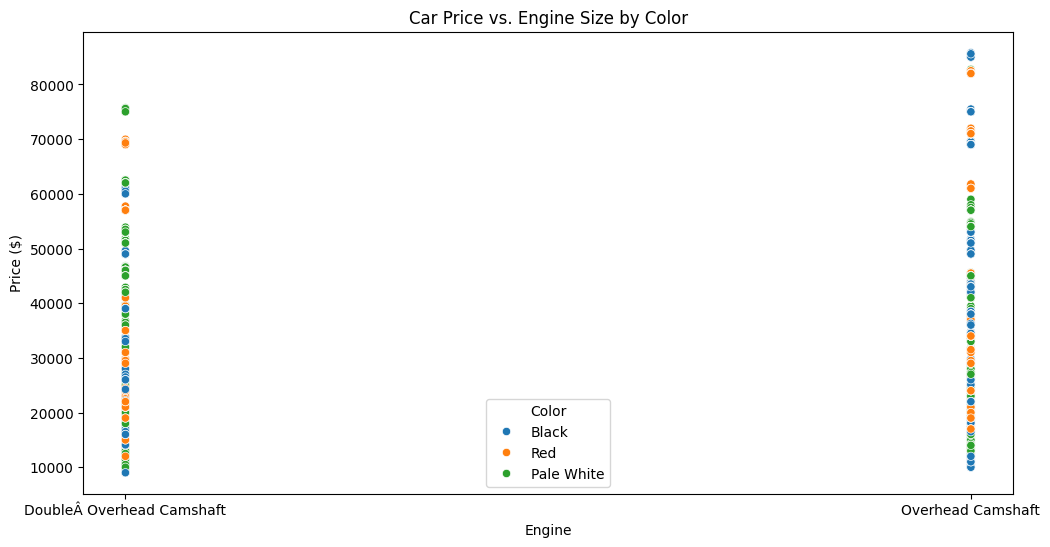

Color
Red           15790.828579
Black         15312.950011
Pale White    13850.177578
Name: Price ($), dtype: float64


In [301]:
# 11 How does car price vary with engine size across different car colors, and which colors have the highest price variation ?
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Engine', y='Price ($)', hue='Color', data=df_car)
plt.title('Car Price vs. Engine Size by Color')
plt.show()
df_higest_price = df_car.groupby('Color')["Price ($)"].std().sort_values(ascending = False)
print(df_higest_price)

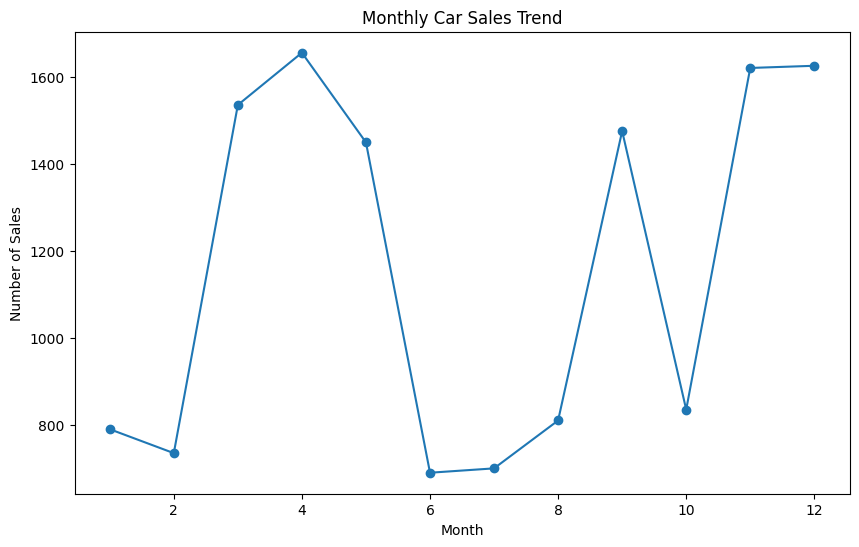

In [302]:
# 12. Is there any seasonal trend in car sales based on the date of sale?

df_car['Date'] = pd.to_datetime(df_car['Date'], format='%m/%d/%Y')
df_car['Month'] = df_car['Date'].dt.month
monthly_sales = df_car.groupby('Month').size()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()


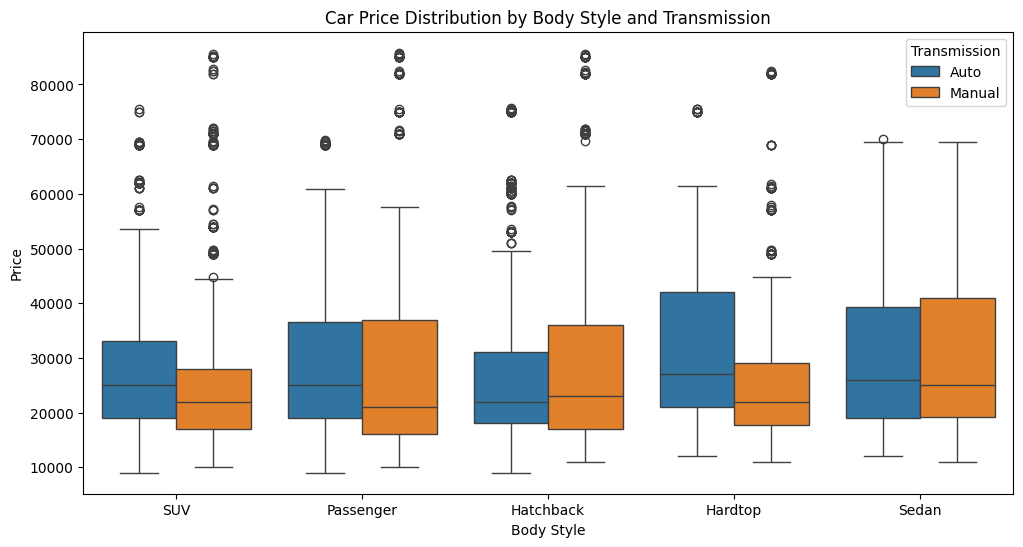

In [303]:
# 13 How does the car price distribution change when considering different combinations of body style and transmission type?
plt.figure(figsize=(12,6))
sns.boxplot(x = 'Body Style', y = 'Price ($)', hue = 'Transmission', data = df_car)
plt.xlabel('Body Style')
plt.ylabel('Price')
plt.title('Car Price Distribution by Body Style and Transmission')
plt.show()

In [304]:
df_car

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income_Bracket,Month
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000.0,06457-3834,SUV,8264678.0,Middletown,Low,1
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000.0,60504-7114,SUV,6848189.0,Aurora,High,1
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500.0,38701-8047,Passenger,7298798.0,Greenville,Medium-High,1
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000.0,99301-3882,SUV,6257557.0,Pasco,Low,1
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500.0,53546-9427,Hatchback,7081483.0,Janesville,High,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13914,C_CND_013915,2023-05-22,Sabrina,Male,519000,Pars Auto Sales,Honda,Accord,Overhead Camshaft,Manual,Black,43000.0,38701-8047,Sedan,6716118.0,Greenville,Medium-Low,5
13915,C_CND_013916,2023-05-22,Sadie,Male,3270000,Pitre Buick-Pontiac-Gmc of Scottsdale,Nissan,Maxima,Overhead Camshaft,Manual,Pale White,54000.0,99301-3882,Sedan,7694302.0,Pasco,High,5
13916,C_CND_013917,2023-05-22,Salma,Male,13500,Progressive Shippers Cooperative Association No,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Red,22000.0,53546-9427,SUV,7635011.0,Janesville,Low,5
13917,C_CND_013918,2023-05-22,Samantha,Male,530000,Rabun Used Car Sales,Mercury,Grand Marquis,Overhead Camshaft,Manual,Red,71000.0,85257-3102,SUV,8539149.0,Scottsdale,Medium-Low,5


In [306]:
# 14What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
df_correlation = df_car[['Annual Income','Price ($)','Engine']].corr()
print(df_correlation)


ValueError: could not convert string to float: 'DoubleÂ\xa0Overhead Camshaft'


15. Average car price by model and engine type:
 Engine    DoubleÂ Overhead Ca  DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                                      
3-Sep                     0.0               36699.504950           0.000000
3000GT                    0.0               22442.250000       21730.109756
300M                      0.0               21286.021739           0.000000
323i                      0.0               16718.269231       21038.333333
328i                      0.0               20984.662338       38440.595745
...                       ...                        ...                ...
Viper                     0.0               32292.474138       26053.892857
Voyager                   0.0               22071.523810       33371.375000
Windstar                  0.0               25318.172414       17131.000000
Wrangler                  0.0               21591.241379       18697.589744
Xterra                    0.0         

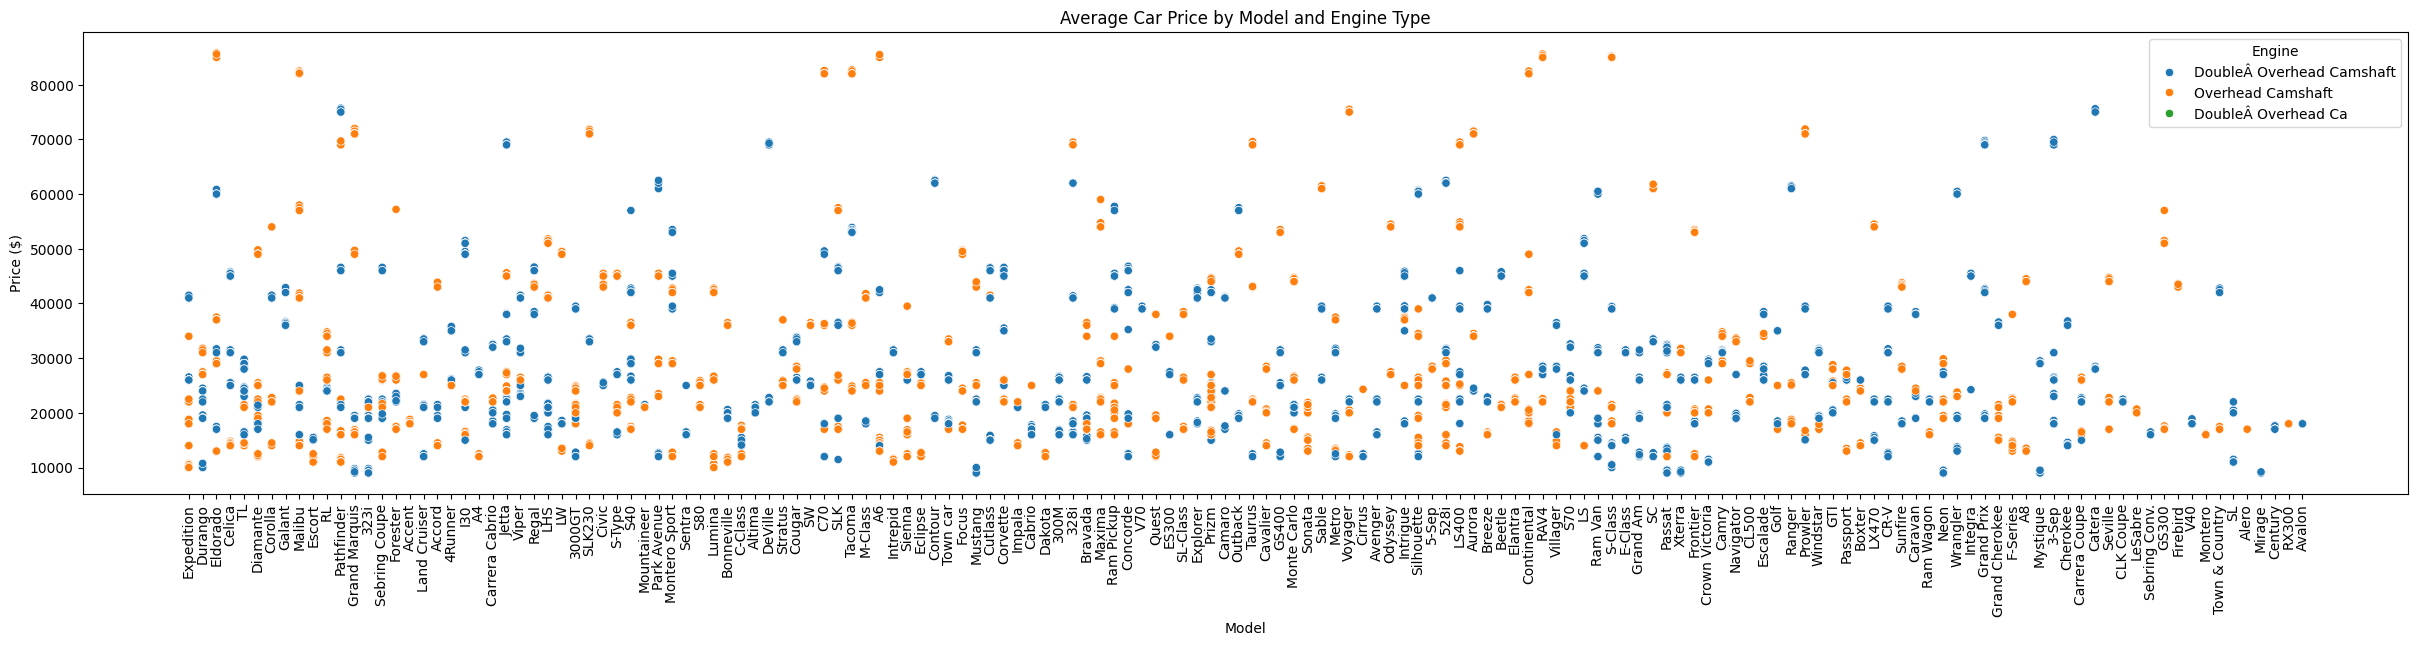

In [307]:
# 15. How does the average car price vary across different car models and engine types?
avg_price_by_model_engine = df_car.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack().fillna(0)
print("\n15. Average car price by model and engine type:\n", avg_price_by_model_engine)
plt.figure(figsize=(30, 6))
sns.scatterplot(x='Model', y='Price ($)', hue='Engine' , data=df_car)
plt.title('Average Car Price by Model and Engine Type')
plt.xticks(rotation=90)
plt.show()

#**EDA** - 3 Amazon Sales Data Description: This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.
**Features**:
 product_id: Unique identifier for each product
 product_name: Name of the product
 category: Category of the product
 discounted_price: Discounted price of the product
 actual_price: Actual price of the product
 discount_percentage: Percentage of discount for the product
 rating: Rating of the product (1-5)
 rating_count: Number of people who voted for the Amazon rating about_product: Description about the product
 user_id: ID of the user who wrote the review
 user_name: Name of the user who wrote the review
 review_id: ID of the user review
 review_title: Short review
 review_content: Long review
 img_link: Image link of the product
 product_link: Official website link of the product

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [309]:
df_amazon = pd.read_csv('/content/amazon (1).csv')

In [310]:
df_amazon

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [311]:
df_amazon.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,object
actual_price,object
discount_percentage,object
rating,object
rating_count,object
about_product,object
user_id,object


In [312]:
df_amazon['rating_count'].unique()

array(['24,269', '43,994', '7,928', ..., '468', '8,031', '6,987'],
      dtype=object)

In [313]:
df_amazon['discount_percentage'] = df_amazon['discount_percentage'].str.replace('%', '').astype(float)

In [314]:
df_amazon['discount_percentage']

,discount_percentage
0,64.0
1,43.0
2,90.0
3,53.0
4,61.0
...,...
1460,59.0
1461,25.0
1462,28.0
1463,26.0


In [315]:
df_amazon.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,object
actual_price,object
discount_percentage,float64
rating,object
rating_count,object
about_product,object
user_id,object


In [316]:
df_amazon['discounted_price'] = df_amazon['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)

In [317]:
df_amazon['discounted_price']

,discounted_price
0,399.0
1,199.0
2,199.0
3,329.0
4,154.0
...,...
1460,379.0
1461,2280.0
1462,2219.0
1463,1399.0


In [318]:
df_amazon['actual_price'] = df_amazon['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

In [319]:
df_amazon['actual_price']

,actual_price
0,1099.0
1,349.0
2,1899.0
3,699.0
4,399.0
...,...
1460,919.0
1461,3045.0
1462,3080.0
1463,1890.0


In [320]:
df_amazon.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,float64
actual_price,float64
discount_percentage,float64
rating,object
rating_count,object
about_product,object
user_id,object


In [321]:
df_amazon['rating']

,rating
0,4.2
1,4.0
2,3.9
3,4.2
4,4.2
...,...
1460,4
1461,4.1
1462,3.6
1463,4


In [322]:
df_amazon['rating'] = pd.to_numeric(df_amazon['rating'], errors='coerce')

In [323]:
df_amazon.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,float64
actual_price,float64
discount_percentage,float64
rating,float64
rating_count,object
about_product,object
user_id,object


In [324]:
df_amazon['rating_count']

,rating_count
0,"24,269"
1,"43,994"
2,"7,928"
3,"94,363"
4,"16,905"
...,...
1460,"1,090"
1461,"4,118"
1462,468
1463,"8,031"


In [325]:
df_amazon['rating_count'] = df_amazon['rating_count'].str.replace(',', '').astype(float)

In [326]:
df_amazon.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,float64
actual_price,float64
discount_percentage,float64
rating,float64
rating_count,float64
about_product,object
user_id,object


In [327]:
df_amazon['rating_count']

,rating_count
0,24269.0
1,43994.0
2,7928.0
3,94363.0
4,16905.0
...,...
1460,1090.0
1461,4118.0
1462,468.0
1463,8031.0


In [328]:
# 1. What is the average rating for each product category?
avg_rating_by_category = df_amazon.groupby('category')['rating'].mean().sort_values(ascending=False)
print("1. Average rating by category:\n", avg_rating_by_category)


1. Average rating by category:
 category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|A

In [329]:
# 2. What are the top rating_count products by category?
top_rating_count_products = df_amazon.groupby('category')['rating_count'].idxmax()
print("2. Top rating_count products by category:\n", top_rating_count_products)

2. Top rating_count products by category:
 category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    1157
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                    695
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                            906
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                         748
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                            844
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         616
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pe

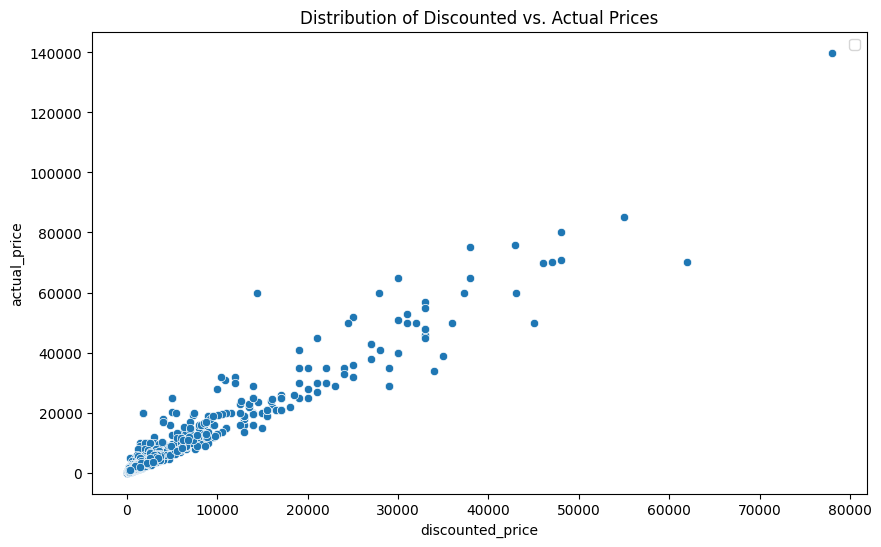

In [330]:
# 3. What is the distribution of discounted prices vs. actual prices?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_amazon, x='discounted_price', y = 'actual_price')
plt.title('Distribution of Discounted vs. Actual Prices')
plt.legend()
plt.show()

In [331]:
# 4. How does the average discount percentage vary across categories?
avg_discount_by_category = df_amazon.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print("\n4. Average discount percentage by category:\n", avg_discount_by_category)



4. Average discount percentage by category:
 category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                            90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                    90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                   90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                   88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers         87.5
                                                                                                                      ... 
OfficeProducts|OfficeElectronics|Calculators|Financial&Business                                                        0.0
OfficeProducts|OfficePaperProducts|Paper|Copy&PrintingPaper|ColouredPaper           

In [332]:
# 5. What are the most popular product names?
popular_products = df_amazon['product_name'].value_counts().head(10)
print("\n5. Most popular product names:\n", popular_products)



5. Most popular product names:
 product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                                                            3
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                                 3
Flix Micro Usb Cable For Smartphone (Black)                                                                                           

In [333]:
# 6. What are the most popular product keywords?
from collections import Counter
import re

def extract_keywords(text):
    if isinstance(text, str):  # Check if it is a string
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        words = text.lower().split()
        return [word for word in words if word not in ['the', 'a', 'an', 'is', 'are', 'and', 'of', 'in', 'for', 'on', 'with']] # remove stop words
    else:
        return []

df_amazon['keywords'] = df_amazon['about_product'].apply(extract_keywords)
all_keywords = [word for sublist in df_amazon['keywords'] for word in sublist]
keyword_counts = Counter(all_keywords).most_common(20)
print("\n6. Most popular product keywords:\n", keyword_counts)



6. Most popular product keywords:
 [('to', 3786), ('your', 1867), ('you', 1268), ('usb', 1008), ('it', 991), ('or', 974), ('can', 891), ('cable', 831), ('from', 772), ('this', 754), ('1', 649), ('charging', 621), ('up', 620), ('be', 514), ('that', 511), ('warranty', 497), ('power', 496), ('as', 486), ('not', 473), ('design', 471)]


In [334]:
# 7. What are the most popular product reviews?

df_amazon['full_review'] = df_amazon['review_title'].astype(str) + " " + df_amazon['review_content'].astype(str) # Combine and convert to string
popular_reviews = df_amazon['full_review'].value_counts().head(10)
print("\n7. Most popular product reviews:\n", popular_reviews)



7. Most popular product reviews:
 full_review
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. Thi

In [335]:
# 8. What is the correlation between discounted_price and rating?
correlation = df_amazon['discounted_price'].corr(df_amazon['rating'])
print("\n8. Correlation between discounted price and rating:\n", correlation)



8. Correlation between discounted price and rating:
 0.12033741712288548


In [336]:
# 9. What are the Top 5 categories based on the highest ratings?
top_5_categories = avg_rating_by_category.head(5)
print("\n9. Top 5 categories based on highest ratings:\n", top_5_categories)



9. Top 5 categories based on highest ratings:
 category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [337]:
# 10. Identify any potential areas for improvement or optimization based on the data analysis.
print("\n10. Potential areas for improvement:\n")
print("- Categories with low average ratings need attention to improve product quality or customer satisfaction.")
print("- Products with low ratings but high discount percentages may indicate that the discount is not enough to offset negative customer experiences.")
print("- Analyze popular keywords to understand customer interests and potentially optimize product descriptions or marketing.")



10. Potential areas for improvement:

- Categories with low average ratings need attention to improve product quality or customer satisfaction.
- Products with low ratings but high discount percentages may indicate that the discount is not enough to offset negative customer experiences.
- Analyze popular keywords to understand customer interests and potentially optimize product descriptions or marketing.


#**EDA
#spotify data

In [338]:
df_spotify = pd.read_csv('/content/spotify (1).csv')

In [339]:
df_spotify

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [340]:
# 1Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful?
df_spotify.isnull().sum()


,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [341]:
df_spotify.duplicated().sum()

np.int64(27)

In [342]:
df_spotify.drop_duplicates(inplace = True)

In [343]:
df_spotify.duplicated().sum()

np.int64(0)

In [344]:
df_spotify.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

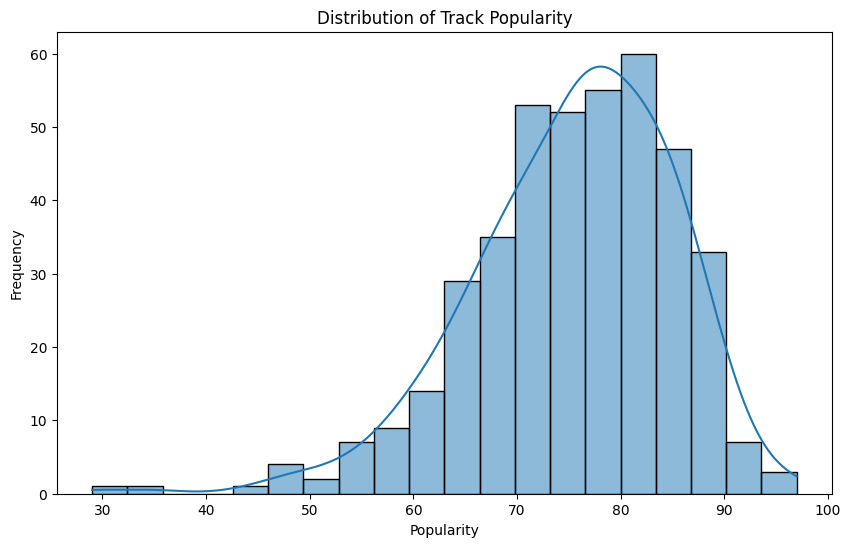

In [345]:
#What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram ?
plt.figure(figsize=(10, 6))
sns.histplot(df_spotify['Popularity'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

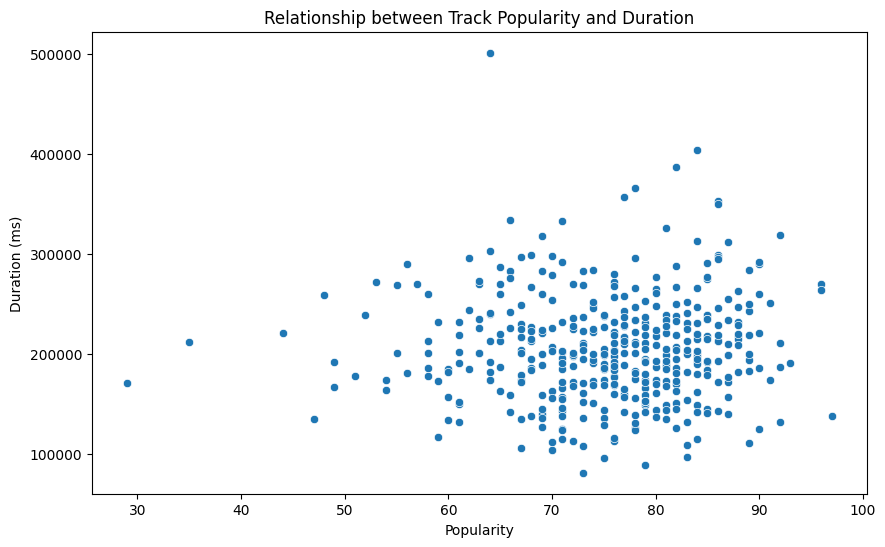

In [346]:
# 3Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Popularity', y='Duration (ms)', data=df_spotify)
plt.title('Relationship between Track Popularity and Duration')
plt.show()

In [347]:
# 4 Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot?
artist_track_count = df_spotify['Artist'].value_counts()
print("4. Artist with the highest number of tracks:\n", artist_track_count.head(1))

4. Artist with the highest number of tracks:
 Artist
Drake    17
Name: count, dtype: int64


In [348]:
# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.
least_popular_tracks = df_spotify.sort_values('Popularity').head(5)
print("\n5. Top 5 least popular tracks:\n", least_popular_tracks[['Artist', 'Track Name', 'Popularity']])



5. Top 5 least popular tracks:
              Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [349]:
# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.
top_5_artists = df_spotify['Artist'].value_counts().head(5).index
top_5_artists_df = df_spotify[df_spotify['Artist'].isin(top_5_artists)]
avg_popularity_by_artist = top_5_artists_df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print("\n6. Average popularity of top 5 artists:\n", avg_popularity_by_artist)



6. Average popularity of top 5 artists:
 Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


In [350]:
# 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
def most_popular_tracks(df, artists):
    result = {}
    for artist in artists:
        artist_df = df[df['Artist'] == artist]
        most_popular_track = artist_df.sort_values('Popularity', ascending=False).iloc[0]['Track Name']
        result[artist] = most_popular_track
    return result

top_tracks_by_artist = most_popular_tracks(df_spotify, top_5_artists)
print("\n7. Most popular tracks for top 5 artists:\n", top_tracks_by_artist)



7. Most popular tracks for top 5 artists:
 {'Drake': 'Rich Baby Daddy (feat. Sexyy Red & SZA)', 'Eminem': 'Without Me', 'Lil Nas X': 'THATS WHAT I WANT', 'JAY-Z': 'Ni**as In Paris', '21 Savage': 'redrum'}


<Figure size 1000x800 with 0 Axes>

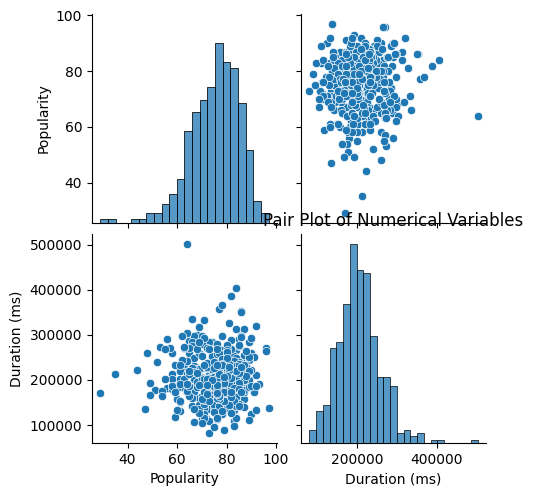

In [351]:
# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.
plt.figure(figsize=(10, 8))
sns.pairplot(df_spotify[['Popularity', 'Duration (ms)']])
plt.title('Pair Plot of Numerical Variables')
plt.show()


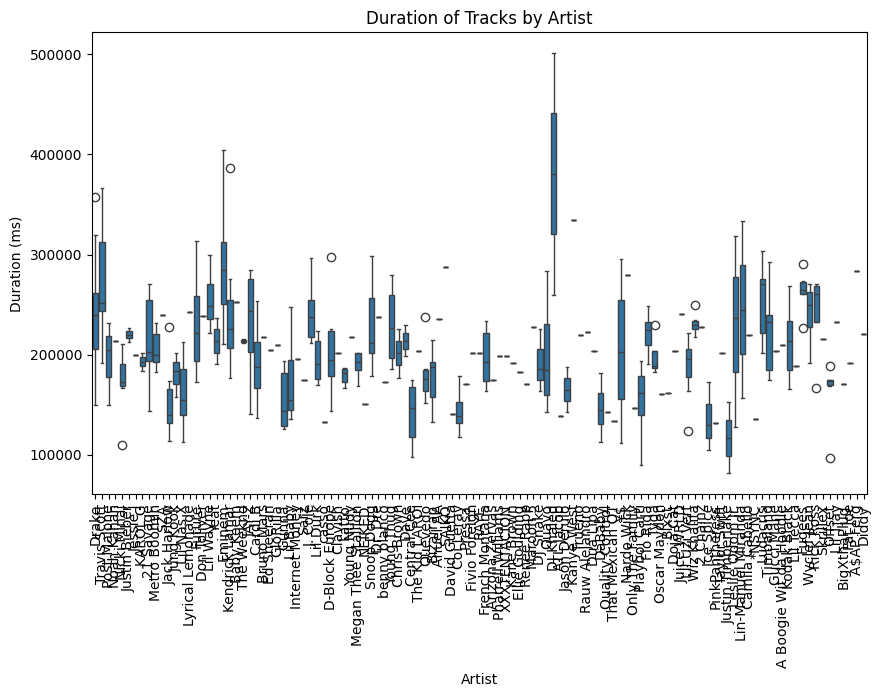

In [352]:
# 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df_spotify)
plt.title('Duration of Tracks by Artist')
plt.xticks(rotation=90)
plt.show()

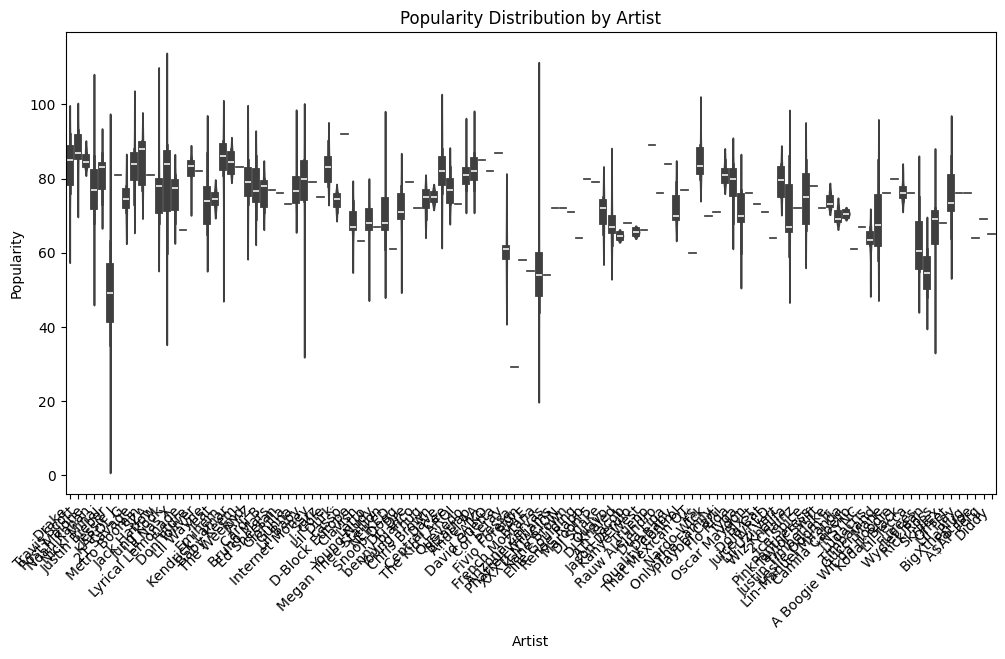

In [353]:
# 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=df_spotify)
plt.title('Popularity Distribution by Artist')
plt.xticks(rotation=45, ha='right')
plt.show()